In [1]:
import mastermat

First, you would make the master matrix by making a meta-manager which knows about the location of each PSF, and then using these locations in combination with the PSFs to do a singular value decomposition thereof. Normalizing the results of the singular value decomposition, you would get a matrix of kernels and a matrix of weights, which, when multiplied together, should give a matrix whose columns can be shifted up and down to make the final mastermat.

This is intended to be run once,

In [2]:
row_inds_csr, col_inds_csr, values_csr, row_inds, col_inds, values = mastermat.load_memmaps((800,1280))

In [3]:
row_ins_csr, col_inds_csr, values_csr = mastermat.compute_csr(row_inds, col_inds, values)

In [4]:
import numpy as np
np.save("row_inds_csr.npy", row_inds_csr)
np.save("col_inds_csr.npy", col_inds_csr)
np.save("values_csr.npy", values_csr) 

In [5]:
values_csr.shape

(41609491,)

In [6]:
row_inds_csr.shape

(1024001,)

In [7]:
import scipy
mastermat_csr = scipy.sparse.csr_matrix((values_csr, col_inds_csr, row_inds_csr), shape=(row_inds_csr.shape[0]-1, row_inds_csr.shape[0]-1))

In [8]:
mastermat_csr.shape

(1024000, 1024000)

In [9]:
import imageio
import cv2

In [10]:
img_resized = imageio.imread("../data/nV3_resized/1.png")

/tmp/ipykernel_488108/2906533047.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_resized = imageio.imread("../data/nV3_resized/1.png")


In [11]:
img_resized.shape

(800, 1280)

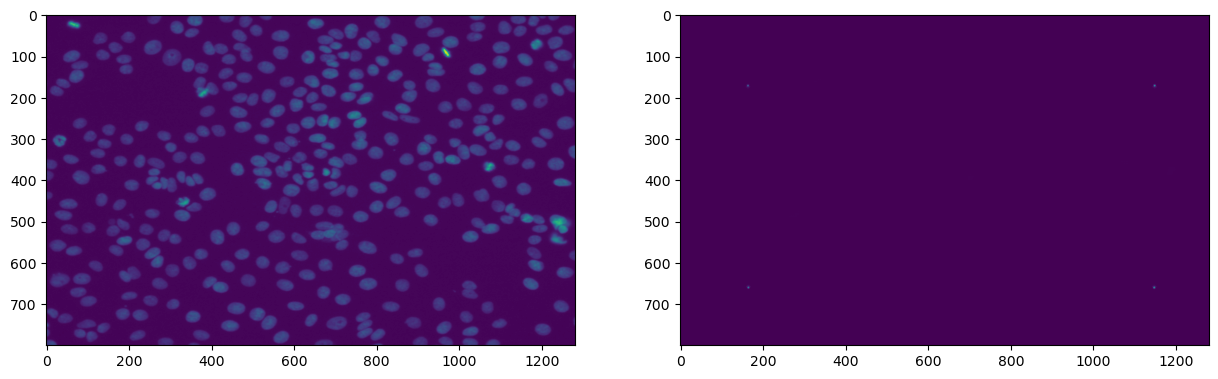

In [12]:
from matplotlib import pyplot as plt
import pdb
fig, axs = plt.subplots(1, 2, figsize=(15,15))
axs[0].imshow(img_resized)
axs[1].imshow(mastermat.simulate_image(img_resized, mastermat_csr))

In [13]:
simmed_img = mastermat.simulate_image(img_resized, mastermat_csr)

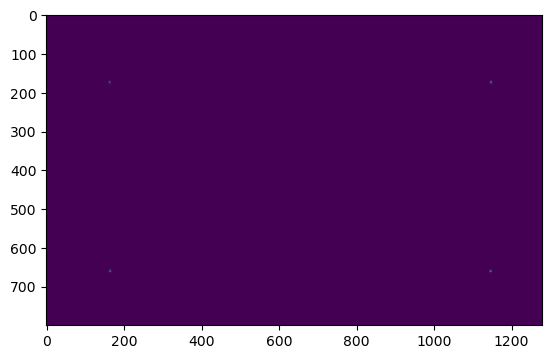

In [14]:
plt.imshow(simmed_img)

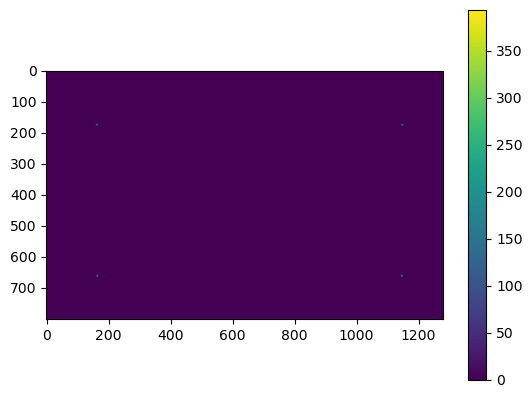

In [15]:
plt.imshow(mastermat.simulate_image(np.ones((800,1280)), mastermat_csr))
plt.colorbar()

In [16]:
values_csr

array([0.        , 0.00106313, 0.00123562, ..., 0.00156705, 0.00122089,
       0.00129406])

In [17]:
bc = np.bincount(col_inds_csr)
np.arange(bc.shape[0])[bc == 0].shape

(184341,)

In [18]:
NNZ = values[values!=0].shape[0] 
ri_delta = np.bincount(row_inds[:NNZ].astype(np.int64))

In [19]:
np.arange(ri_delta.shape[0])[ri_delta!=0].shape

(976865,)

In [20]:
np.any(values_csr < 0)

False

It seems that the vast majority of rows have at least one nonzero value, and majority of columns have nonzero values as well. Respectively, these facts imply that almost all points on the image have something mapping to them, and almost all points on the object map to something. Also, none of the values are negative.

However, I'm still getting the image above with only four points. The only reason that I could think of is that those four points are much brighter than the rest of the image.

A way to test this hypothesis is to make a plot of a Boolean selector matrix, which I'll do below.

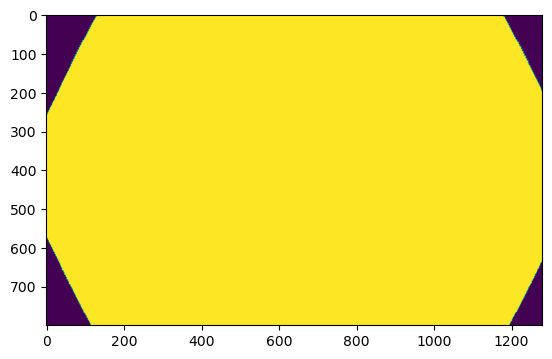

In [21]:
plt.imshow(simmed_img > 0)

Yes, hypothesis confirmed.

In [22]:
csr_from_coo = scipy.sparse.csr_matrix((values[:NNZ], (row_inds[:NNZ], col_inds[:NNZ])), shape=(800*1280, 800*1280))

In [23]:
csr_from_coo.indptr.shape

(1024001,)

In [24]:
mastermat_csr.indptr.shape

(1024001,)

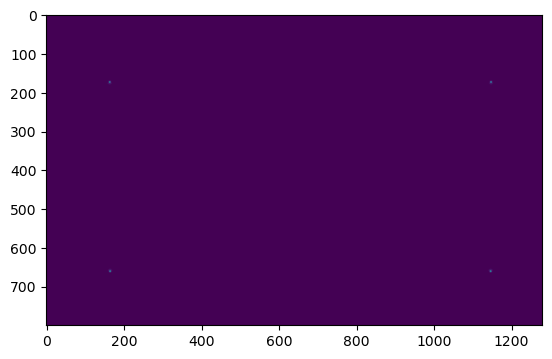

In [25]:
plt.imshow(mastermat.simulate_image(np.ones((800,1280)), csr_from_coo))

In [26]:
np.arange(800*1280)[np.ravel(simmed_img) > 200]

array([216186, 216190, 216482, 216483, 216484, 216485, 216486, 217466,
       217467, 217468, 217469, 217470, 217761, 217762, 217763, 217764,
       217765, 217766, 217767, 218745, 218746, 218747, 218748, 218749,
       218750, 218751, 219041, 219042, 219043, 219044, 219045, 219046,
       219047, 220024, 220025, 220026, 220027, 220028, 220029, 220030,
       220031, 220321, 220322, 220323, 220324, 220325, 220326, 220327,
       221305, 221306, 221307, 221308, 221309, 221310, 221311, 221600,
       221601, 221602, 221603, 221604, 221605, 221606, 221607, 221608,
       222584, 222585, 222586, 222587, 222588, 222589, 222590, 222591,
       222592, 222881, 222882, 222883, 222884, 222885, 222886, 222887,
       223864, 223865, 223866, 223867, 223868, 223869, 223870, 223871,
       223872, 224159, 224160, 224161, 224162, 224163, 224164, 224165,
       224166, 224167, 224168, 224169, 225143, 225144, 225145, 225146,
       225147, 225148, 225149, 225150, 225151, 225152, 225153, 225439,
      

In [ ]:
import one_shot_svd
pdb.set_trace()
metaman = one_shot_svd.load_metaman("/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv")
kermat, weightsmat = one_shot_svd.generate_unpadded("/home/dshteinbok/nV3_PSFs_flat", metaman, (800,1280), (640, 1024))

--Return--
None
> /tmp/ipykernel_488108/1794386503.py(2)<cell line: 2>()
      1 import one_shot_svd
----> 2 pdb.set_trace()
      3 metaman = one_shot_svd.load_metaman("/home/dshteinbok/nV3_PSFs_flat_meta/metafile.csv")
      4 kermat, weightsmat = one_shot_svd.generate_unpadded("/home/dshteinbok/nV3_PSFs_flat", metaman, (800,1280), (640, 1024))

ipdb> b one_shot_svd.py:32
Breakpoint 2 at /home/dshteinbok/MultiWienerNet/common/one_shot_svd.py:32
ipdb> c
    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

    [... skipped 1 hidden frame]

> /home/dshteinbok/MultiWienerNet/common/one_shot_svd.py(32)find_pixel_on_obj()
     30         img_dims: the pixel dimensions of the image, as (y, x)
     31     """
2--> 32     return (int(x*img_dims[1]/obj_dims[1]), int(y*img_dims[0]/obj_dims[0]))
     33 
     34 

ipdb> up
> /home/dshteinbok/MultiWienerNet/common/one_shot_svd.py(154)<dictcomp>()
    152     # We're assuming that the pixel-dimensio

ipdb> n
--Return--
(750, 0)
> /home/dshteinbok/MultiWienerNet/common/one_shot_svd.py(32)find_pixel_on_obj()
     30         img_dims: the pixel dimensions of the image, as (y, x)
     31     """
2--> 32     return (int(x*img_dims[1]/obj_dims[1]), int(y*img_dims[0]/obj_dims[0]))
     33 
     34 

ipdb> p origins_pixel
*** NameError: name 'origins_pixel' is not defined
ipdb> n
> /home/dshteinbok/MultiWienerNet/common/one_shot_svd.py(154)<dictcomp>()
    152     # We're assuming that the pixel-dimensions of the object image will actually be the same as img_dims
    153     #find_pixel_on_obj = lambda x,y: (int(x*img_dims[1]/obj_dims[1]), int(y*img_dims[0]/obj_dims[0]))
--> 154     origins_pixel = {k: find_pixel_on_obj(*v, img_dims, obj_dims) for k, v in metaman.field_origins.items()}
    155 
    156     # perform the SVD and interpolate weights based on those pixel values that we calculated

ipdb> cl
Clear all breaks? y
Deleted breakpoint 1 at /home/dshteinbok/MultiWienerNet/common/one_

In [28]:
kermat.shape

(32, 32, 28)

In [29]:
kernels_as_rows = kermat.transpose((2,0,1)).reshape((28,1024))

In [30]:
np.linalg.norm(kernels_as_rows, axis=1)

array([0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
       0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
       0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
       0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
       0.18898224, 0.18898224, 0.18898224, 0.18898224, 0.18898224,
       0.18898224, 0.18898224, 0.18898224])

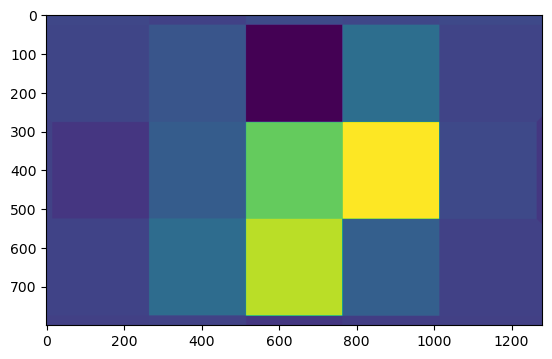

In [31]:
plt.imshow(np.sum(weightsmat, -1))